In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import copy
from scipy import sparse

In [2]:
adata = sc.read('/project/elkabetz_lab_data/public_data/GSE132188/GSE132188_adata.h5ad.h5')

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
#load in raw data
adata_dict = {}
for day,sample in zip(['12.5','13.5','14.5','15.5'],
                      ['GSM3852752_E12_5','GSM3852753_E13_5','GSM3852754_E14_5','GSM3852755_E15_5']):
    print('loading day: ',day)
    adata_dict[day] = sc.read_10x_mtx('/project/elkabetz_lab_data/public_data/GSE132188/'+sample)

loading day:  12.5
loading day:  13.5
loading day:  14.5
loading day:  15.5


In [4]:
adata_merged_raw = adata_dict['12.5'].concatenate(adata_dict['13.5'],
                                                  adata_dict['14.5'],
                                                  adata_dict['15.5'])

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [5]:
adata_merged_sub = adata_merged_raw[adata.obs.index]

In [6]:
adata_merged_sub.obs = adata.obs

In [7]:
adata_merged_sub.obs

day  n_counts  log_counts  n_genes   mt_frac  \
index                                                                 
AAACCTGAGCACCGCT-1-0  12.5    5580.0    8.626944     2180  0.029928   
AAACCTGAGCGCTTAT-1-0  12.5   17605.0    9.775938     3743  0.023630   
AAACCTGAGGGAAACA-1-0  12.5   20882.0    9.946643     4714  0.020879   
AAACCTGAGGTACTCT-1-0  12.5   20594.0    9.932755     4371  0.029523   
AAACCTGAGTCACGCC-1-0  12.5   17685.0    9.780472     4115  0.029969   
...                    ...       ...         ...      ...       ...   
TTTGTCAGTTGTTTGG-1-3  15.5    6453.0    8.772301     2471  0.022935   
TTTGTCATCCTGCAGG-1-3  15.5   28195.0   10.246900     4469  0.012378   
TTTGTCATCGAATGCT-1-3  15.5   12690.0    9.448569     3614  0.028290   
TTTGTCATCTGTTTGT-1-3  15.5    7568.0    8.931684     2933  0.027484   
TTTGTCATCTTAACCT-1-3  15.5   22748.0   10.032232     4105  0.016617   

                     proliferation  G2M_score   S_score clusters_fig3_final  \
index                                                                         
AAACCTGAGCACCGCT-1-0       Cycling  -0.252388  0.039791               Trunk   
AAACCTGAGCGCTTAT-1-0       Cycling   0.179029  0.362894                 Tip   
AAACCTGAGGGAAACA-1-0       Cycling  -0.170436  0.220229         Ngn3 low EP   
AAACCTGAGGTACTCT-1-0       Cycling   0.056714  0.625414           Prlf. Tip   
AAACCTGAGTCACGCC-1-0       Cycling  -0.204127  0.160393                 Tip   
...                            ...        ...       ...                 ...   
TTTGTCAGTTGTTTGG-1-3   Non-Cycling  -0.208907 -0.045692              Ductal   
TTTGTCATCCTGCAGG-1-3       Cycling   0.599579  0.252814         Mat. Acinar   
TTTGTCATCGAATGCT-1-3   Non-Cycling  -0.206865 -0.240576           Endocrine   
TTTGTCATCTGTTTGT-1-3   Non-Cycling  -0.184763 -0.136407           Endocrine   
TTTGTCATCTTAACCT-1-3       Cycling   0.090423  0.535350         Mat. Acinar   

                     clusters_fig3_final_noep clusters_fig4_final  \
index                                                               
AAACCTGAGCACCGCT-1-0                    Trunk            Excluded   
AAACCTGAGCGCTTAT-1-0                      Tip            Excluded   
AAACCTGAGGGAAACA-1-0                   Ductal         Ngn3 low EP   
AAACCTGAGGTACTCT-1-0                Prlf. Tip            Excluded   
AAACCTGAGTCACGCC-1-0                      Tip            Excluded   
...                                       ...                 ...   
TTTGTCAGTTGTTTGG-1-3                   Ductal     Ductal Bipotent   
TTTGTCATCCTGCAGG-1-3              Mat. Acinar            Excluded   
TTTGTCATCGAATGCT-1-3                Endocrine            Excluded   
TTTGTCATCTGTTTGT-1-3                Endocrine            Excluded   
TTTGTCATCTTAACCT-1-3              Mat. Acinar            Excluded   

                     clusters_fig2_final clusters_fig6_broad_final  \
index                                                                
AAACCTGAGCACCGCT-1-0               Trunk                     Trunk   
AAACCTGAGCGCTTAT-1-0                 Tip                       Tip   
AAACCTGAGGGAAACA-1-0                  EP               Ngn3 low EP   
AAACCTGAGGTACTCT-1-0                 Tip                 Prlf. Tip   
AAACCTGAGTCACGCC-1-0                 Tip                       Tip   
...                                  ...                       ...   
TTTGTCAGTTGTTTGG-1-3              Ductal                    Ductal   
TTTGTCATCCTGCAGG-1-3              Acinar               Mat. Acinar   
TTTGTCATCGAATGCT-1-3           Endocrine                     Alpha   
TTTGTCATCTGTTTGT-1-3           Endocrine                   Epsilon   
TTTGTCATCTTAACCT-1-3              Acinar               Mat. Acinar   

                     clusters_fig6_fine_final clusters_fig6_alpha_final  
index                                                                    
AAACCTGAGCACCGCT-1-0                    Trunk                     Trunk  
AAACCTGAGCGCTTAT-1-0                    

In [8]:
adata_merged_sub.obs = adata.obs
adata_merged_sub.uns = adata.uns
adata_merged_sub.obsm = adata.obsm
adata_merged_sub.obsp = adata.obsp

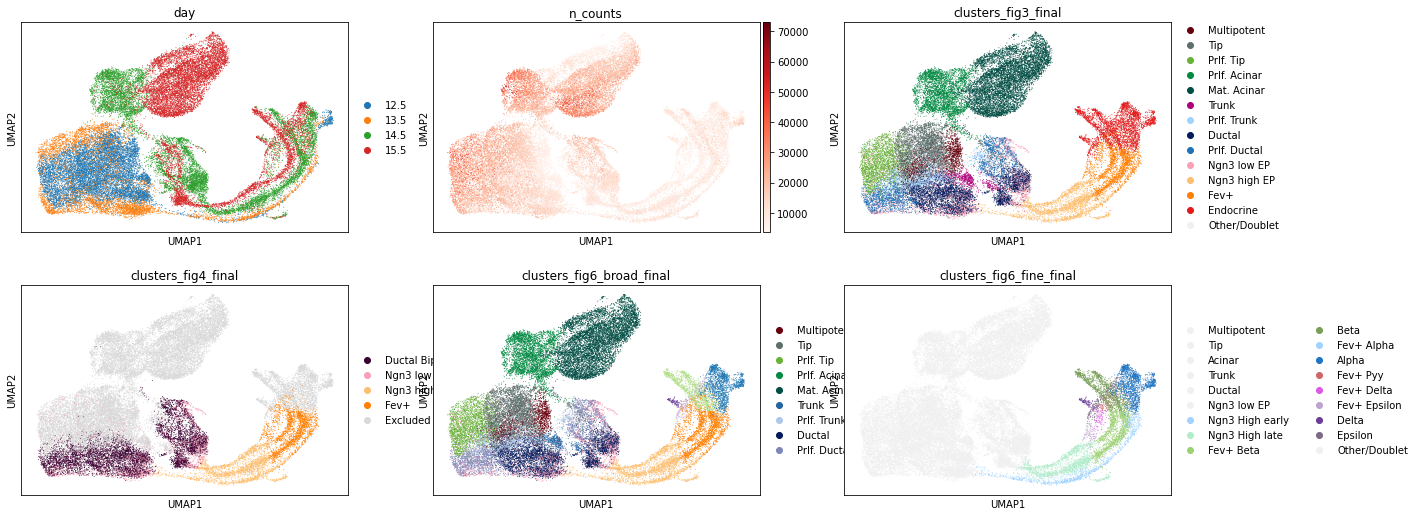

In [9]:
sc.pl.umap(adata_merged_sub,color=['day','n_counts','clusters_fig3_final','clusters_fig4_final',
                            'clusters_fig6_broad_final','clusters_fig6_fine_final'],ncols=3,cmap='Reds')

In [10]:
adata_sub = adata_merged_sub[adata_merged_sub.obs['day']=='14.5']

In [11]:
adata_sub.X

<9633x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 36021571 stored elements in Compressed Sparse Row format>

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


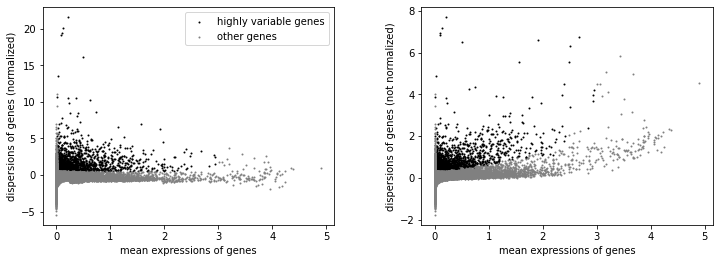

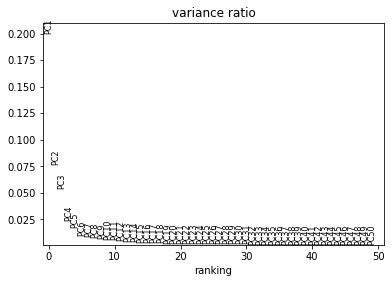

In [12]:
sc.pp.normalize_total(adata_sub,)#, target_sum=1e6)#, inplace=False)
adata_sub.X = np.log1p(adata_sub.X)

sc.pp.highly_variable_genes(adata_sub)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub)

#run PCA
sc.tl.pca(adata_sub, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub)
sc.tl.umap(adata_sub)

In [13]:
adata_sub.obs['G2M_pos']=adata_sub.obs['G2M_score']>0
adata_sub.obs['G2M_pos']=adata_sub.obs['G2M_pos'].astype('string')

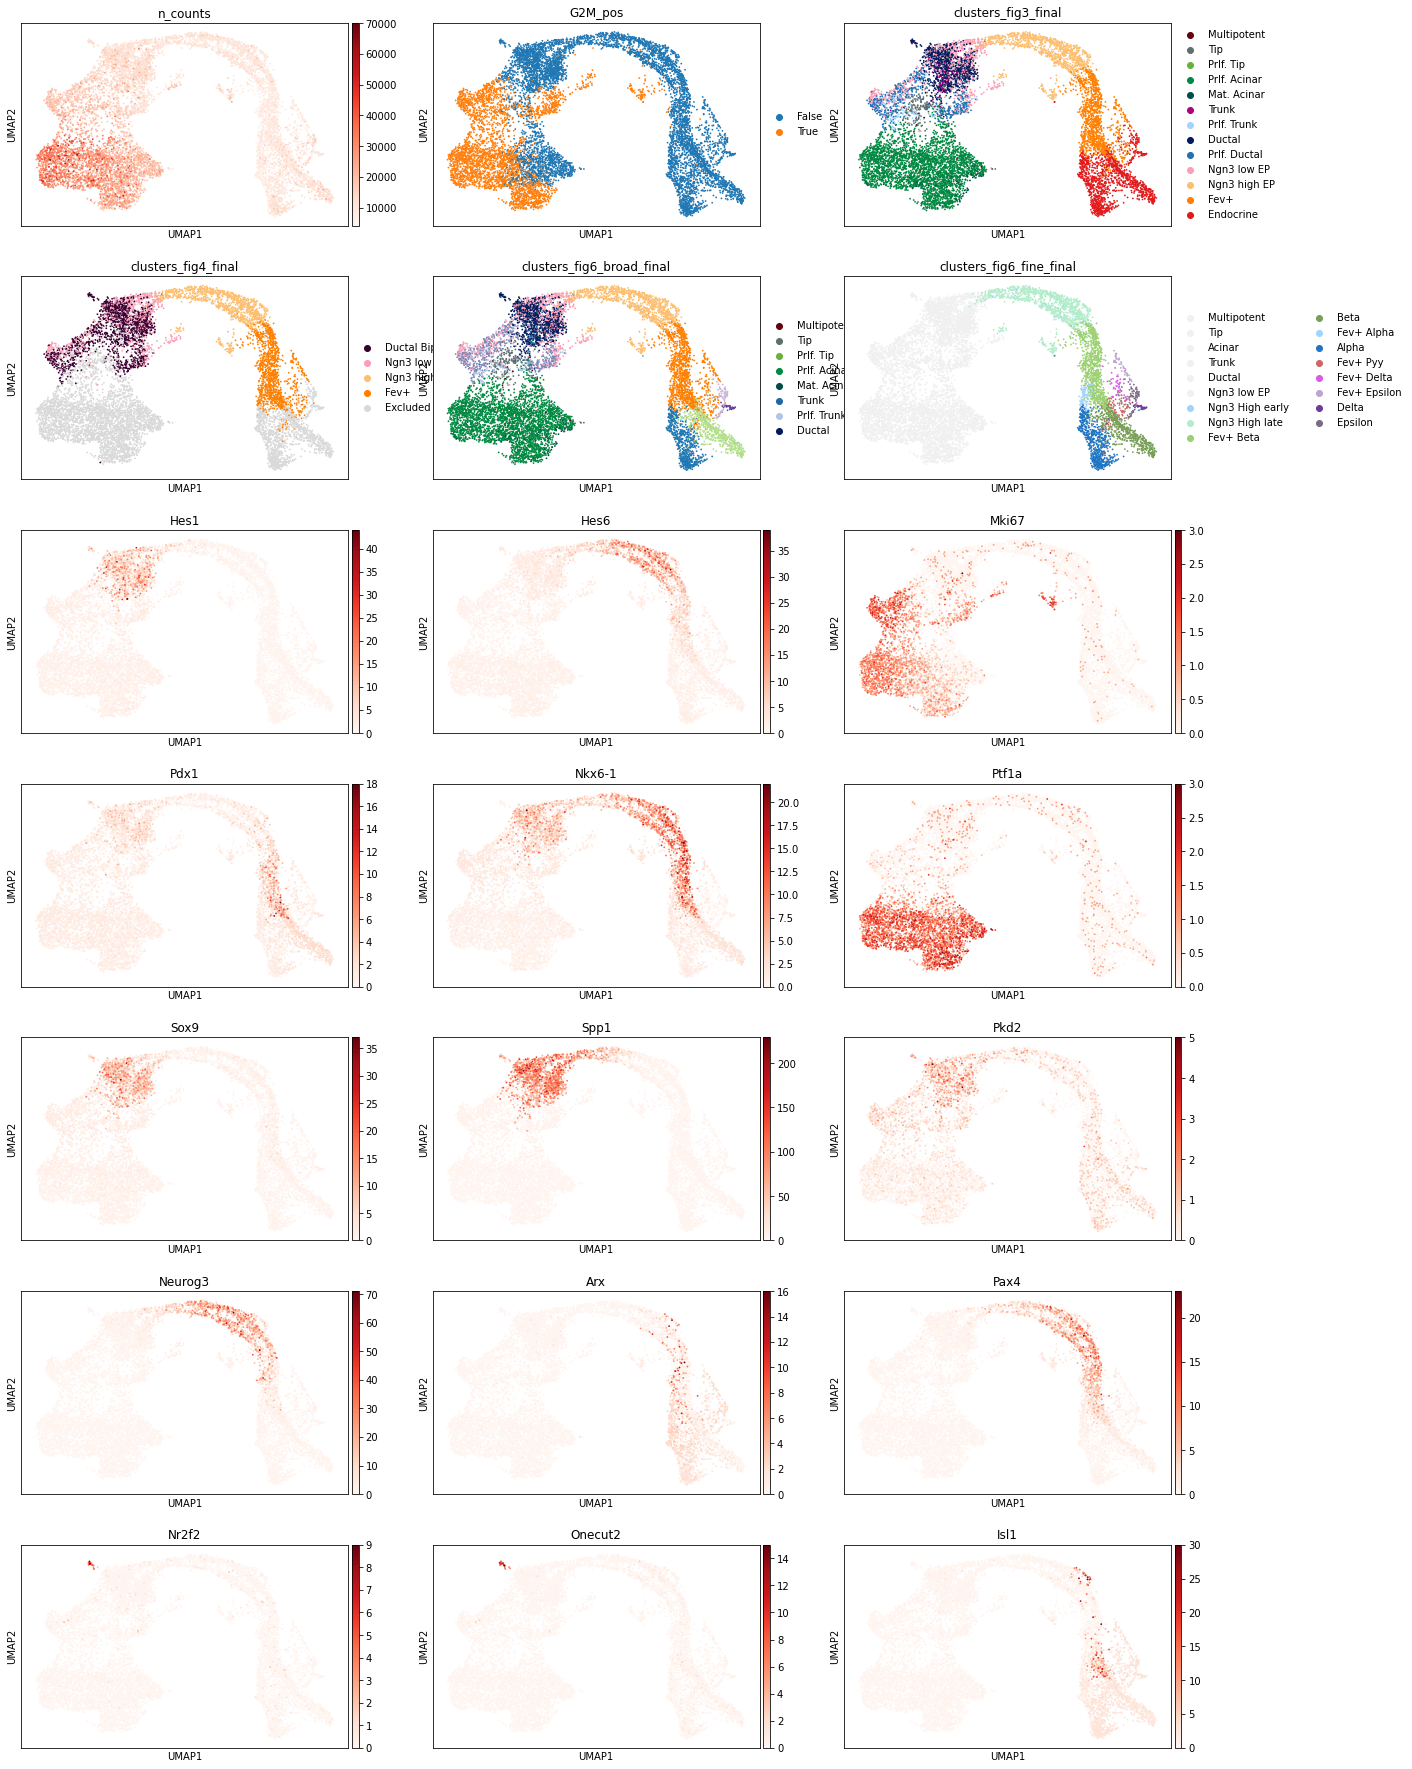

In [35]:
sc.pl.umap(adata_sub,color=['n_counts','G2M_pos','clusters_fig3_final','clusters_fig4_final',
                            'clusters_fig6_broad_final','clusters_fig6_fine_final',
                            'Hes1','Hes6','Mki67','Pdx1','Nkx6-1','Ptf1a','Sox9',
                            'Spp1','Pkd2','Neurog3','Arx','Pax4','Nr2f2','Onecut2','Isl1'],ncols=3,cmap='Reds')

In [15]:
adata_sub_beta = adata_sub[(adata_sub.obs['clusters_fig6_fine_final'].isin(['Ngn3 High early','Ngn3 High late','Fev+ Beta'])) + 
             (adata_sub.obs['clusters_fig3_final'].isin(['Ductal','Ngn3 low EP']))]
adata_sub_beta = adata_sub_beta[adata_sub_beta.obs['G2M_pos'] == 'False']

In [16]:
adata_sub_beta.X = adata_merged_sub[adata_sub_beta.obs.index].X

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


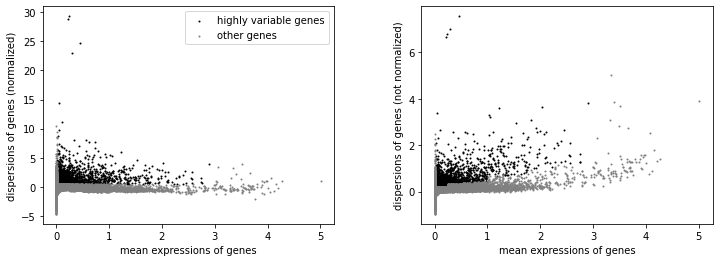

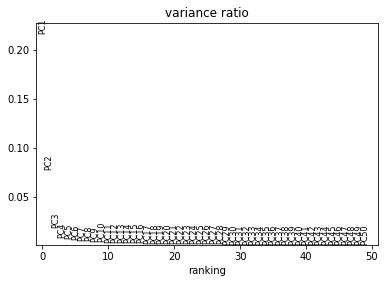

In [17]:
sc.pp.normalize_total(adata_sub_beta,)#, target_sum=1e6)#, inplace=False)
adata_sub_beta.X = np.log1p(adata_sub_beta.X)

sc.pp.highly_variable_genes(adata_sub_beta)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub_beta)

#run PCA
sc.tl.pca(adata_sub_beta, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub_beta, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub_beta)
sc.tl.umap(adata_sub_beta)

In [18]:
adata_sub_beta.obs

day  n_counts  log_counts  n_genes   mt_frac  \
index                                                                 
AAACCTGCACAGAGGT-1-2  14.5    7164.0    8.876823     3032  0.026661   
AAACCTGCAGACAAAT-1-2  14.5   10762.0    9.283776     3026  0.032336   
AAACCTGCAGATGAGC-1-2  14.5    8354.0    9.030496     2990  0.035672   
AAACCTGGTAAGGGCT-1-2  14.5   12506.0    9.433964     3717  0.029106   
AAACCTGGTTAAGATG-1-2  14.5   12651.0    9.445492     3713  0.059600   
...                    ...       ...         ...      ...       ...   
TTTGTCAAGTACTTGC-1-2  14.5    7263.0    8.890549     2849  0.040066   
TTTGTCAAGTCGAGTG-1-2  14.5    8949.0    9.099298     3034  0.027266   
TTTGTCACACTCGACG-1-2  14.5    9344.0    9.142489     3194  0.030394   
TTTGTCATCATCGATG-1-2  14.5   11328.0    9.335032     3525  0.028072   
TTTGTCATCCCATTAT-1-2  14.5   10023.0    9.212638     3119  0.033323   

                     proliferation  G2M_score   S_score clusters_fig3_final  \
index                                                                         
AAACCTGCACAGAGGT-1-2   Non-Cycling  -0.235179 -0.200766                Fev+   
AAACCTGCAGACAAAT-1-2   Non-Cycling  -0.172702 -0.200258        Ngn3 high EP   
AAACCTGCAGATGAGC-1-2   Non-Cycling  -0.259097 -0.137871                Fev+   
AAACCTGGTAAGGGCT-1-2       Cycling  -0.210071  0.087405              Ductal   
AAACCTGGTTAAGATG-1-2       Cycling  -0.165315  0.065157        Ngn3 high EP   
...                            ...        ...       ...                 ...   
TTTGTCAAGTACTTGC-1-2   Non-Cycling  -0.219674 -0.214155                Fev+   
TTTGTCAAGTCGAGTG-1-2   Non-Cycling  -0.217635 -0.186022        Ngn3 high EP   
TTTGTCACACTCGACG-1-2       Cycling  -0.243840  0.062442              Ductal   
TTTGTCATCATCGATG-1-2       Cycling  -0.183451  0.004226        Ngn3 high EP   
TTTGTCATCCCATTAT-1-2   Non-Cycling  -0.185641 -0.149134        Ngn3 high EP   

                     clusters_fig3_final_noep clusters_fig4_final  \
index                                                               
AAACCTGCACAGAGGT-1-2                     Fev+                Fev+   
AAACCTGCAGACAAAT-1-2             Ngn3 high EP        Ngn3 high EP   
AAACCTGCAGATGAGC-1-2                     Fev+                Fev+   
AAACCTGGTAAGGGCT-1-2                   Ductal     Ductal Bipotent   
AAACCTGGTTAAGATG-1-2             Ngn3 high EP        Ngn3 high EP   
...                                       ...                 ...   
TTTGTCAAGTACTTGC-1-2                     Fev+                Fev+   
TTTGTCAAGTCGAGTG-1-2             Ngn3 high EP        Ngn3 high EP   
TTTGTCACACTCGACG-1-2                   Ductal     Ductal Bipotent   
TTTGTCATCATCGATG-1-2             Ngn3 high EP        Ngn3 high EP   
TTTGTCATCCCATTAT-1-2             Ngn3 high EP        Ngn3 high EP   

                     clusters_fig2_final clusters_fig6_broad_final  \
index                                                                
AAACCTGCACAGAGGT-1-2                Fev+                      Fev+   
AAACCTGCAGACAAAT-1-2                  EP              Ngn3 high EP   
AAACCTGCAGATGAGC-1-2                Fev+                      Fev+   
AAACCTGGTAAGGGCT-1-2              Ductal                    Ductal   
AAACCTGGTTAAGATG-1-2                  EP              Ngn3 high EP   
...                                  ...                       ...   
TTTGTCAAGTACTTGC-1-2                Fev+                      Fev+   
TTTGTCAAGTCGAGTG-1-2                  EP              Ngn3 high EP   
TTTGTCACACTCGACG-1-2              Ductal                    Ductal   
TTTGTCATCATCGATG-1-2                  EP              Ngn3 high EP   
TTTGTCATCCCATTAT-1-2                  EP              Ngn3 high EP   

                     clusters_fig6_fine_final clusters_fig6_alpha_final  \
index                                                                     
AAACCTGCACAGAGGT-1-2                Fev+ Beta                 Fev+ Beta   
AAACCTGCAGACAAAT-1-2           Ngn3 H

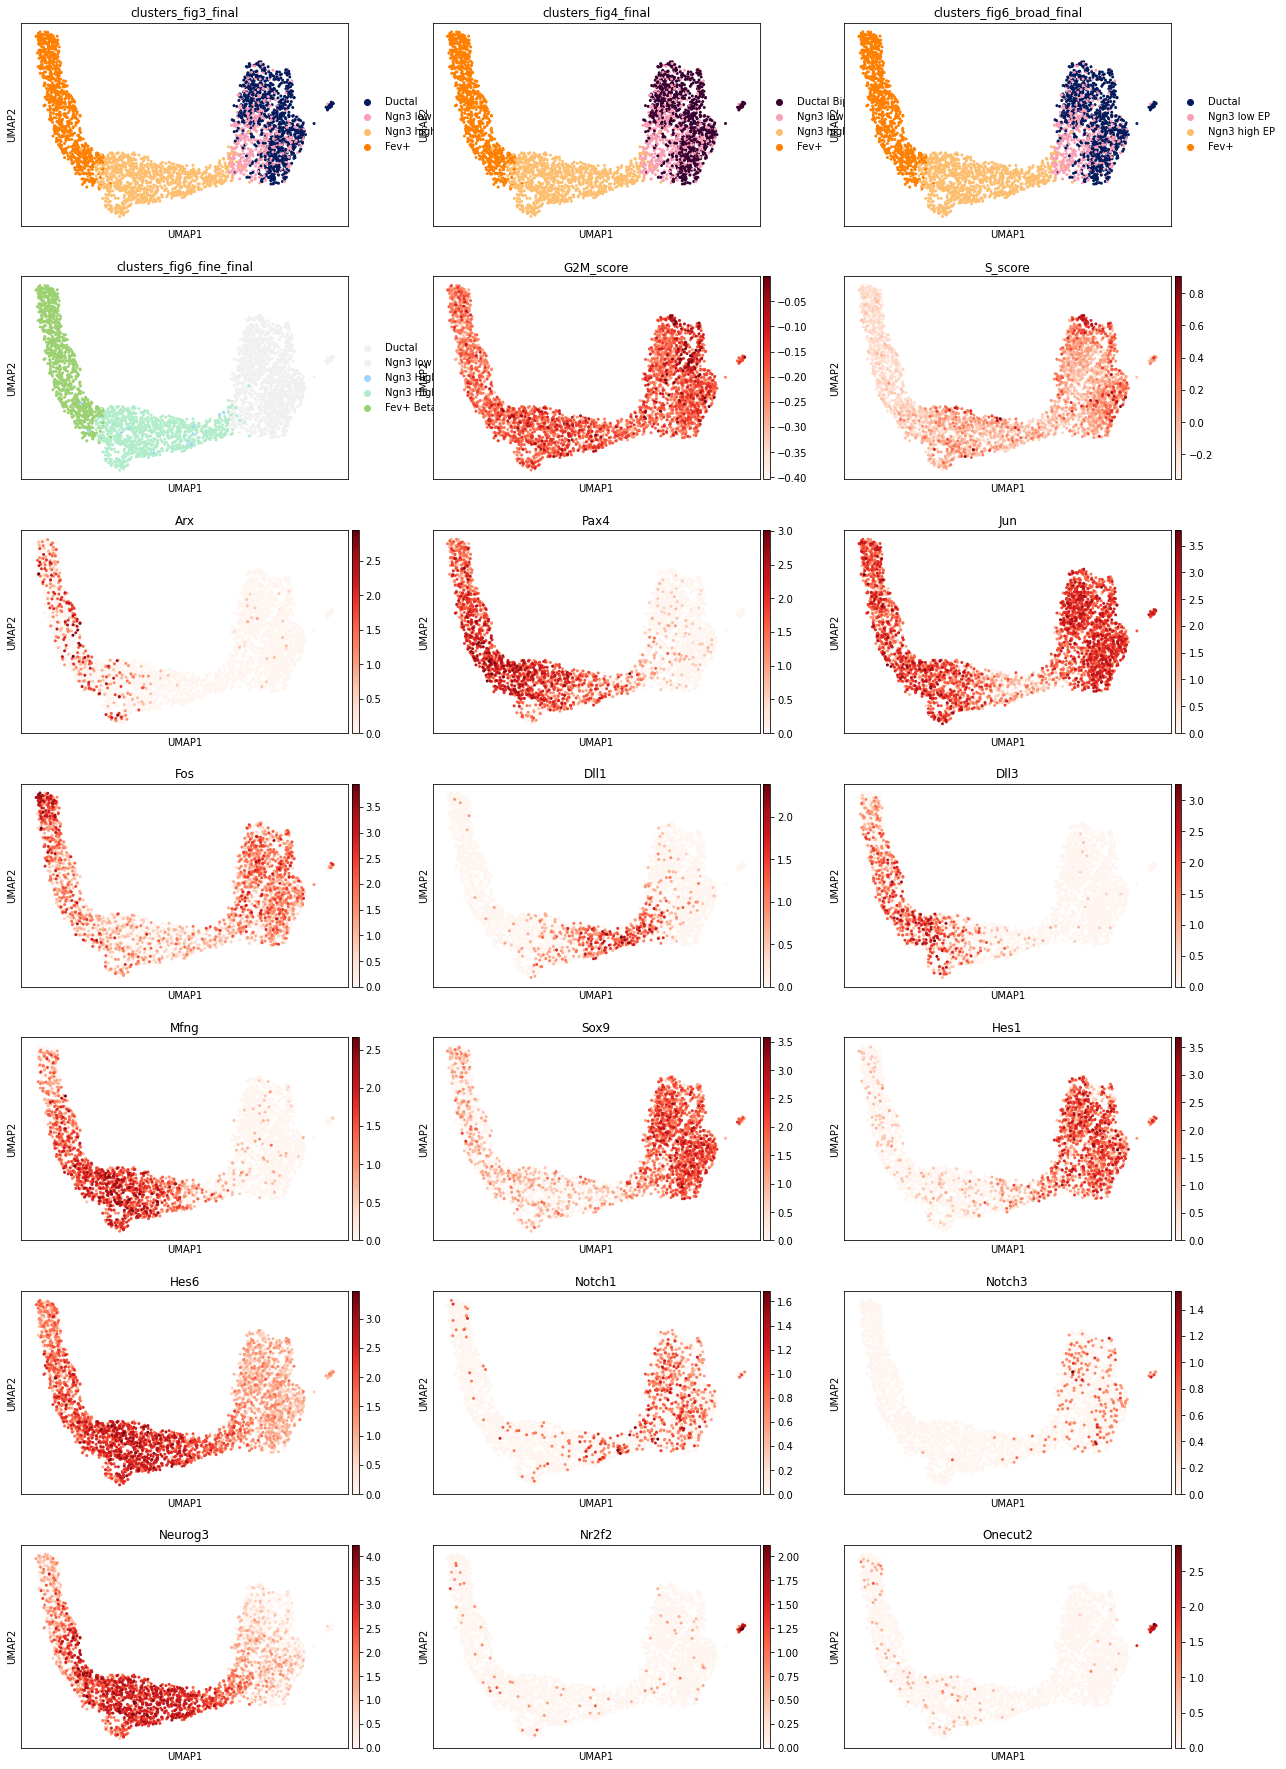

In [19]:
sc.pl.umap(adata_sub_beta,color=['clusters_fig3_final','clusters_fig4_final','clusters_fig6_broad_final','clusters_fig6_fine_final',
                                 'G2M_score','S_score','Arx','Pax4','Jun','Fos','Dll1','Dll3','Mfng','Sox9','Hes1','Hes6',
                                'Notch1','Notch3','Neurog3','Nr2f2','Onecut2'],ncols=3,cmap='Reds')

In [20]:
sc.tl.louvain(adata_sub_beta,resolution=1.5)

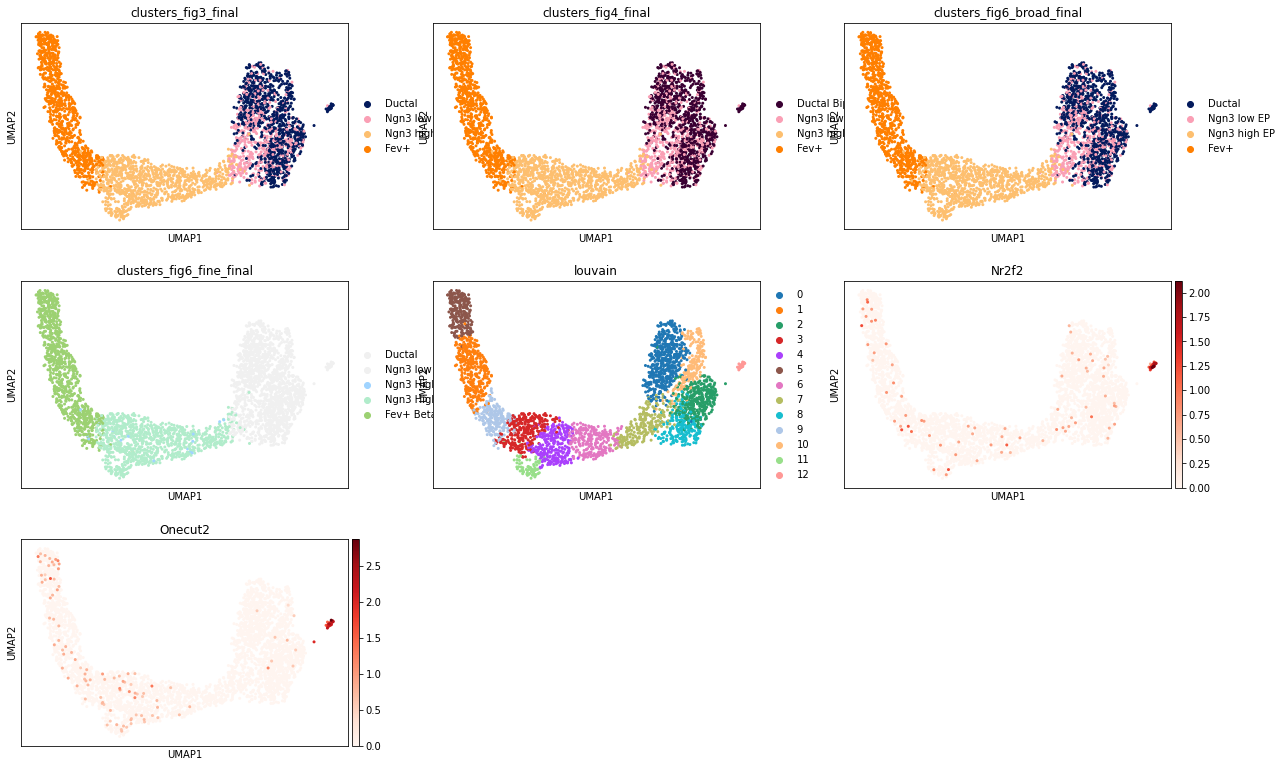

In [21]:
sc.pl.umap(adata_sub_beta,color=['clusters_fig3_final','clusters_fig4_final','clusters_fig6_broad_final','clusters_fig6_fine_final',
                                 'louvain','Nr2f2','Onecut2'],ncols=3,cmap='Reds')

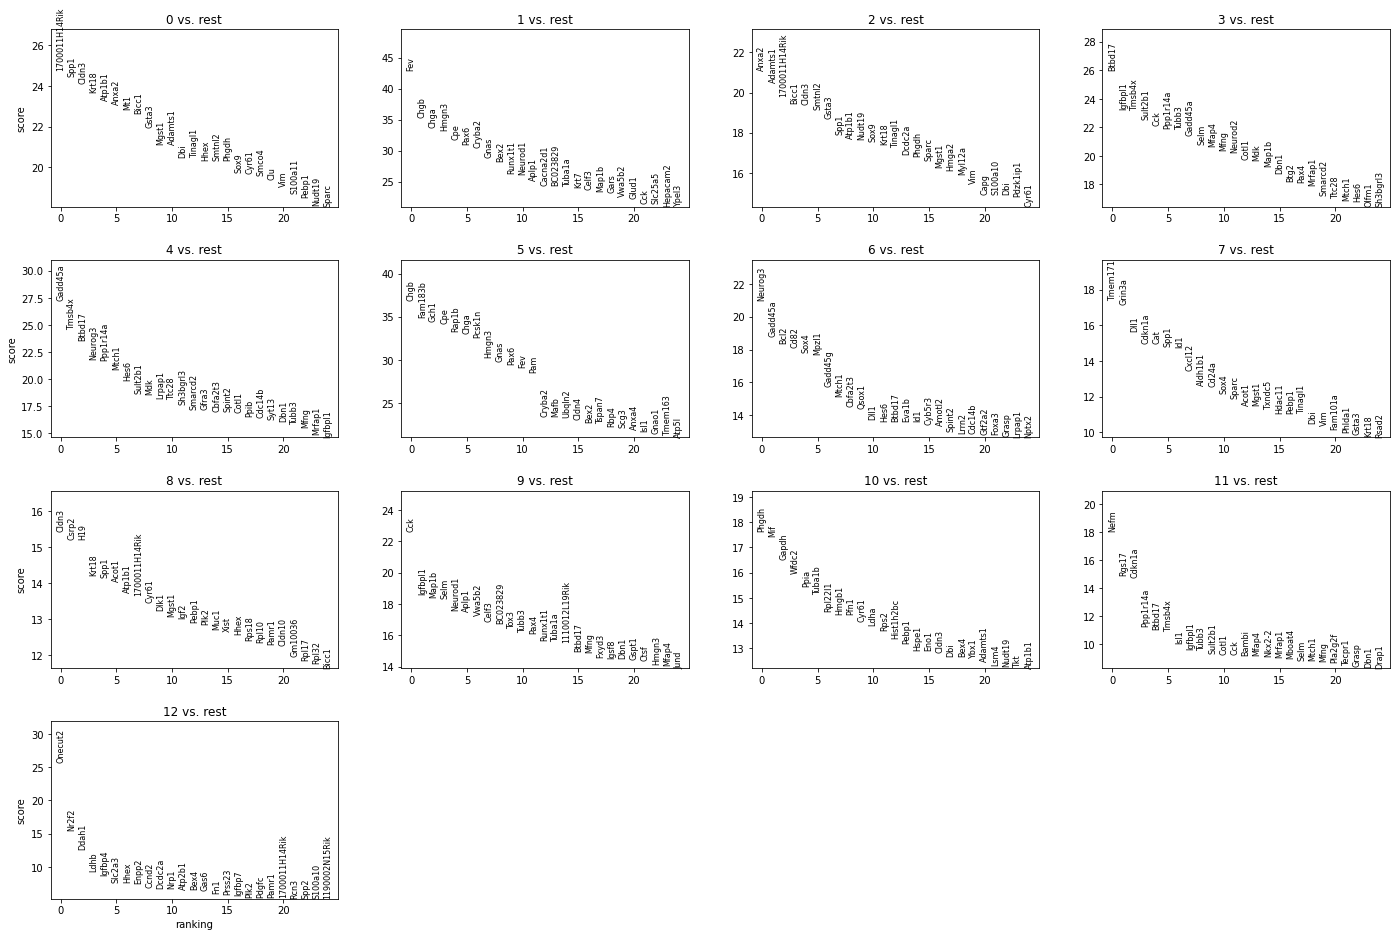

In [22]:
## run marker gene analysis
sc.tl.rank_genes_groups(adata_sub_beta, 'louvain', method='t-test_overestim_var', n_genes=40000)
sc.pl.rank_genes_groups(adata_sub_beta, n_genes=25, sharey=False)

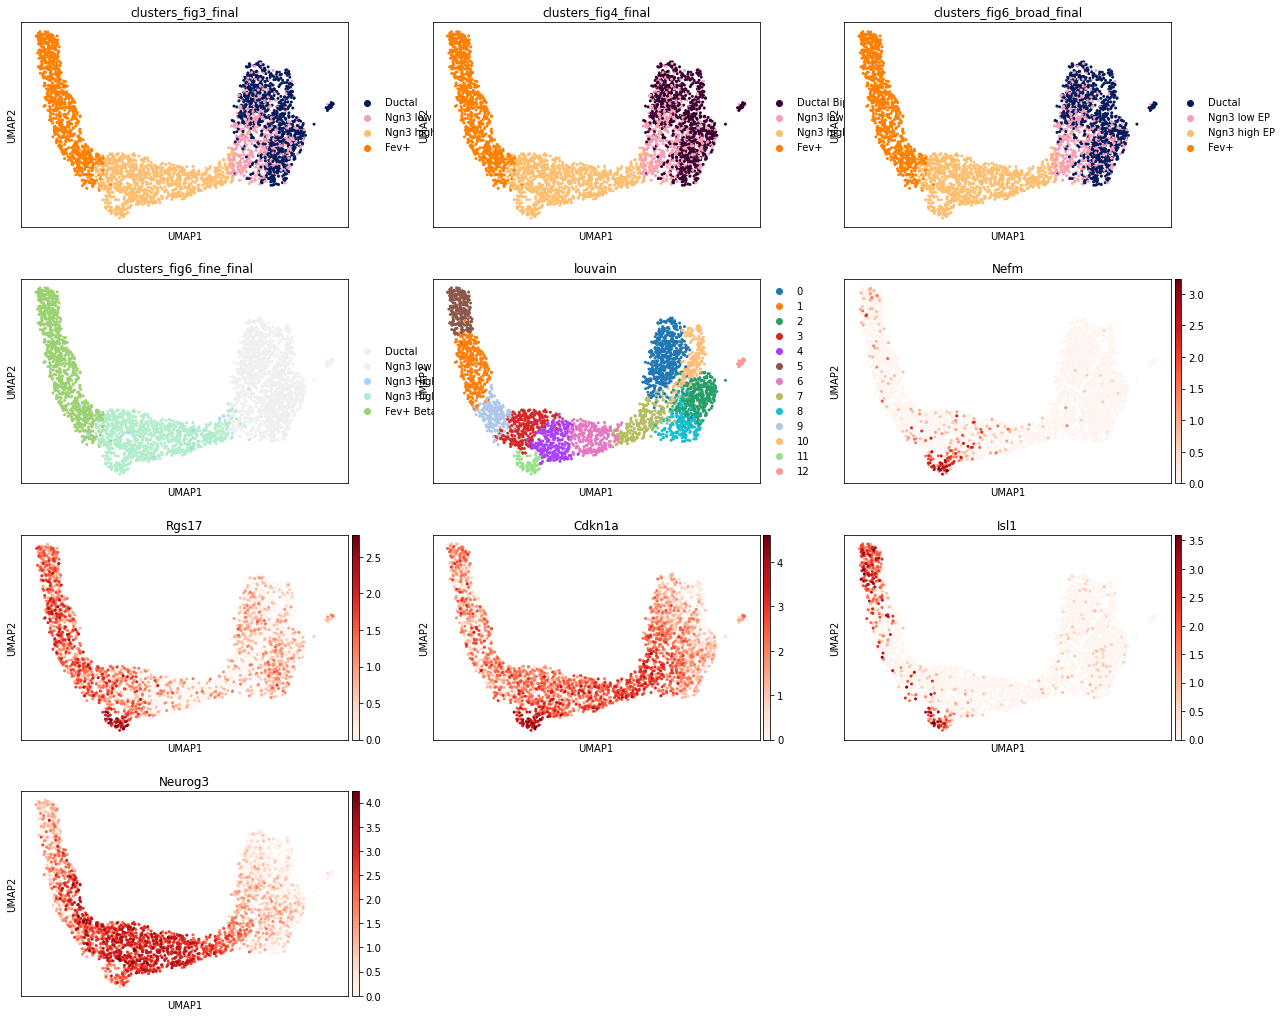

In [23]:
sc.pl.umap(adata_sub_beta,color=['clusters_fig3_final','clusters_fig4_final','clusters_fig6_broad_final','clusters_fig6_fine_final',
                                 'louvain','Nefm','Rgs17','Cdkn1a','Isl1','Neurog3'],ncols=3,cmap='Reds')

In [24]:
#remove clusters 11,12 -- express high levels of Nr2f2, Onecut2 (other cell type), Nefm + Isl1 -- potentially Epsilon/Delta lineage

In [25]:
adata_sub_beta = adata_sub_beta[~adata_sub_beta.obs['louvain'].isin(['11','12'])]

In [26]:
adata_sub_beta.X = adata_merged_sub[adata_sub_beta.obs.index].X

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


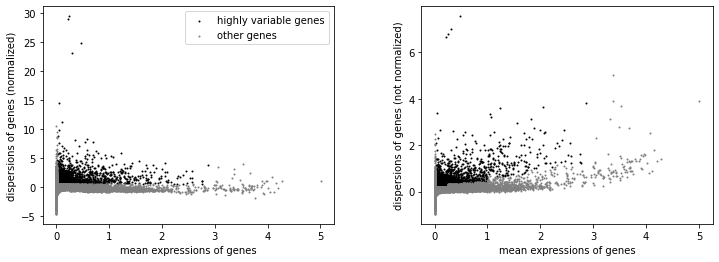

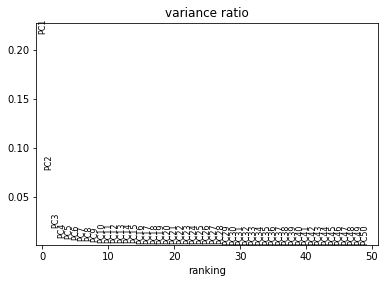

In [27]:
sc.pp.normalize_total(adata_sub_beta,)#, target_sum=1e6)#, inplace=False)
adata_sub_beta.X = np.log1p(adata_sub_beta.X)

sc.pp.highly_variable_genes(adata_sub_beta)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub_beta)

#run PCA
sc.tl.pca(adata_sub_beta, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub_beta, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub_beta)
sc.tl.umap(adata_sub_beta)

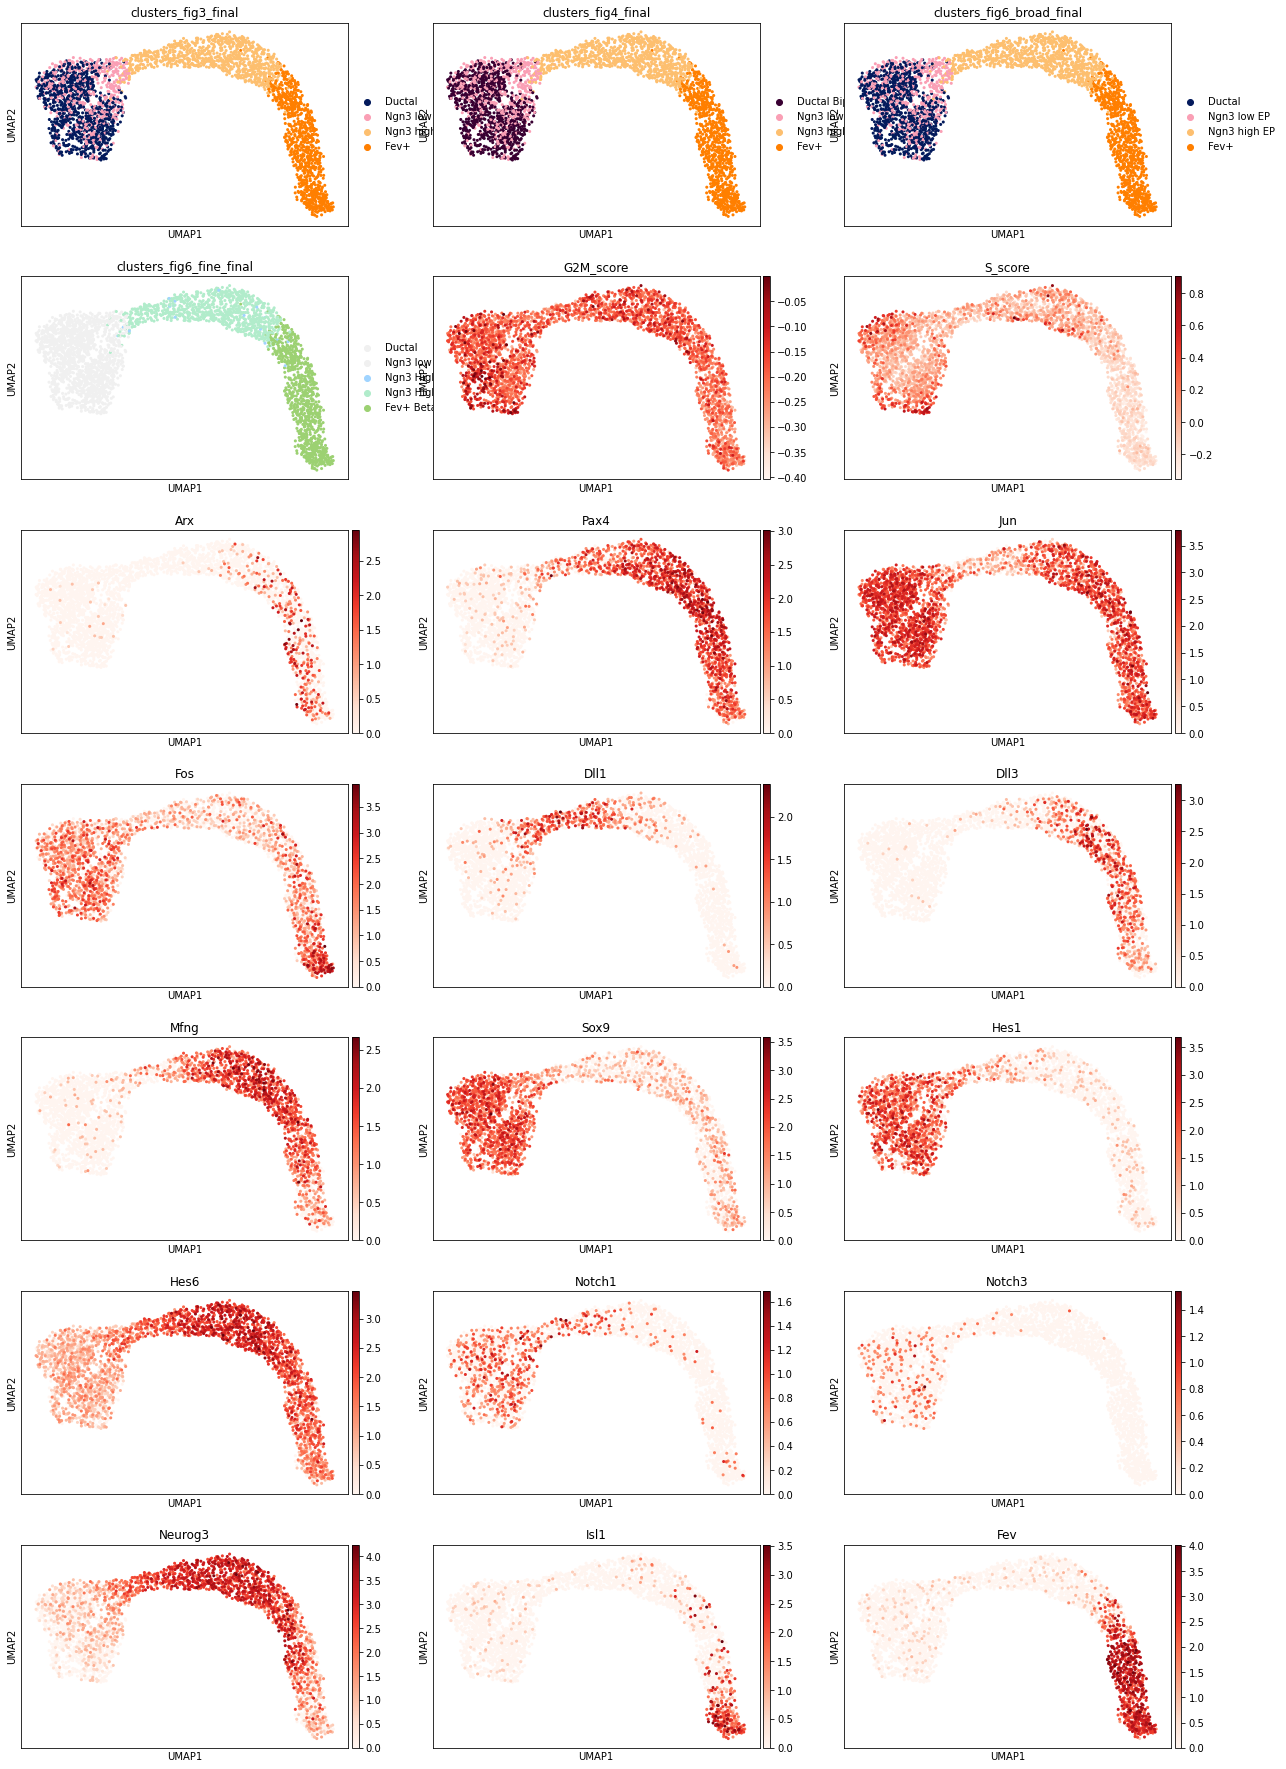

In [28]:
sc.pl.umap(adata_sub_beta,color=['clusters_fig3_final','clusters_fig4_final','clusters_fig6_broad_final','clusters_fig6_fine_final',
                                 'G2M_score','S_score','Arx','Pax4','Jun','Fos','Dll1','Dll3','Mfng','Sox9','Hes1','Hes6',
                                'Notch1','Notch3','Neurog3','Isl1','Fev'],ncols=3,cmap='Reds')

In [29]:
sc.pp.neighbors(adata_sub_beta,method='gauss')
sc.tl.diffmap(adata_sub_beta)

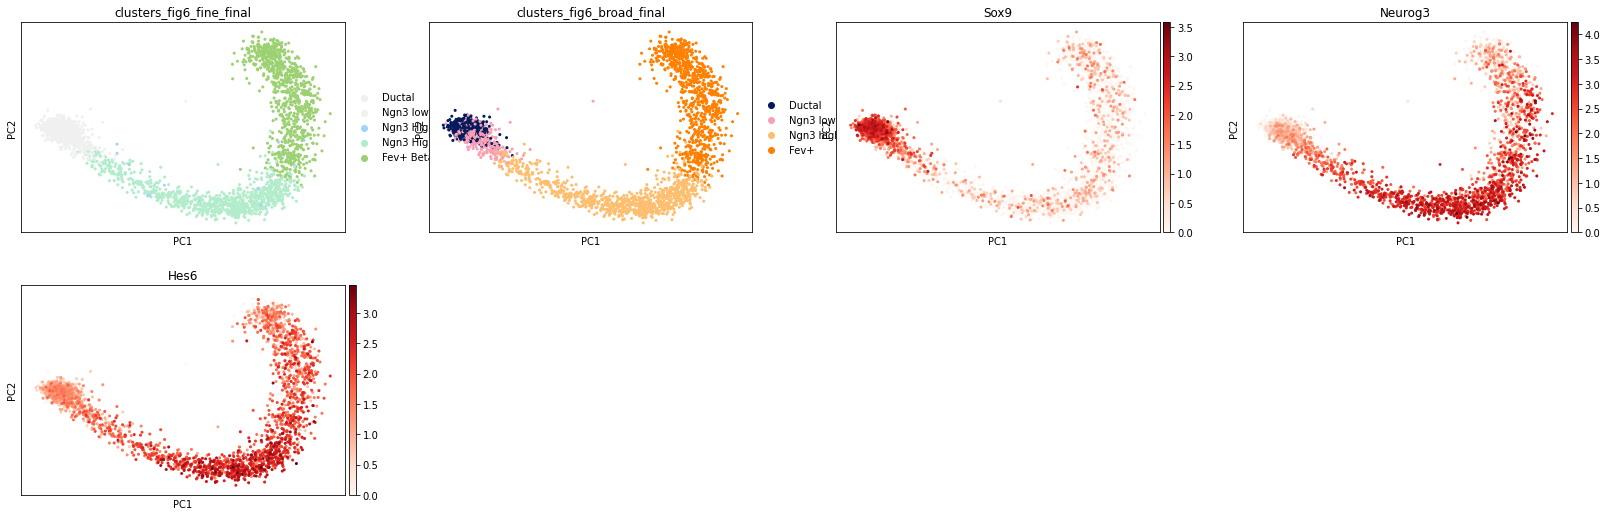

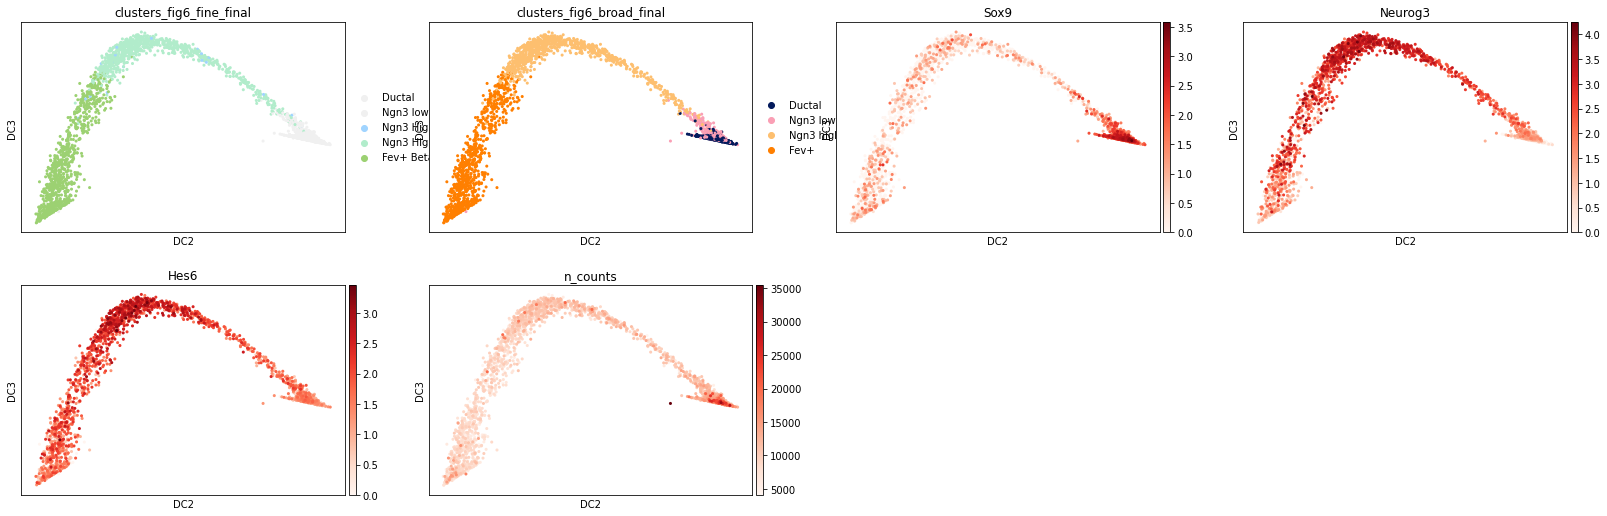

In [30]:
sc.pl.pca(adata_sub_beta,color=['clusters_fig6_fine_final','clusters_fig6_broad_final','Sox9','Neurog3','Hes6'],color_map='Reds',components='1,2')
sc.pl.diffmap(adata_sub_beta,color=['clusters_fig6_fine_final','clusters_fig6_broad_final','Sox9','Neurog3','Hes6','n_counts'],
              color_map='Reds',components='2,3')

In [31]:
adata_sub_beta.uns['iroot'] = np.argmax(adata_sub_beta.obsm['X_diffmap'][:,1])

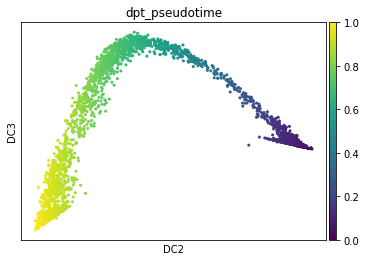

In [32]:
sc.tl.dpt(adata_sub_beta)
sc.pl.diffmap(adata_sub_beta,color=['dpt_pseudotime'],color_map='viridis',components='2,3')

In [33]:
adata_sub_beta.obs['index'] = range(len(adata_sub_beta.obs))

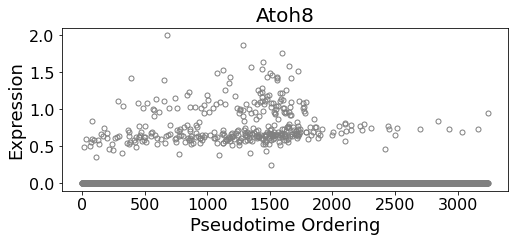

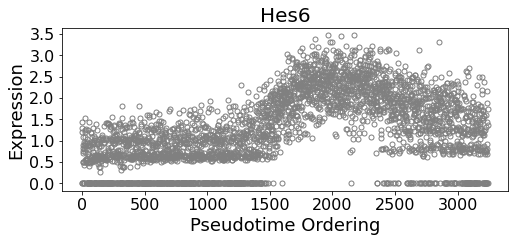

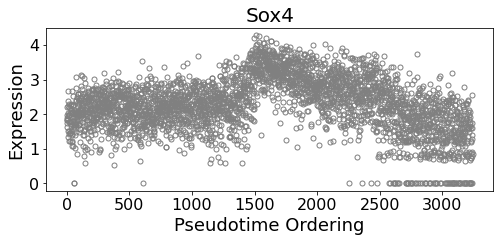

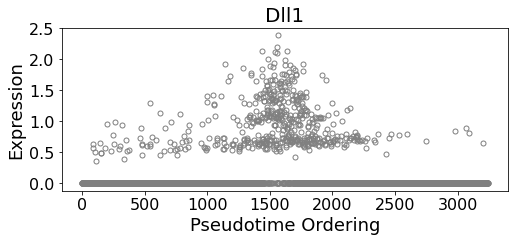

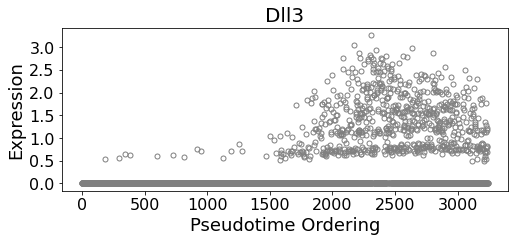

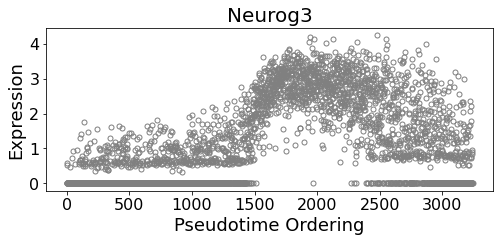

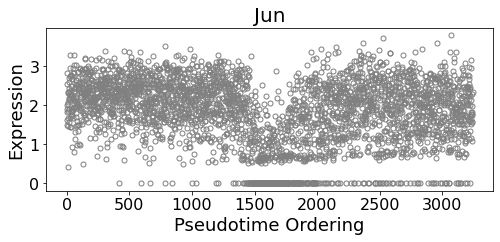

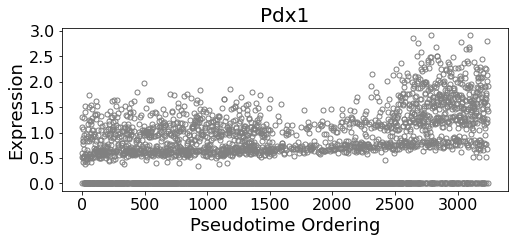

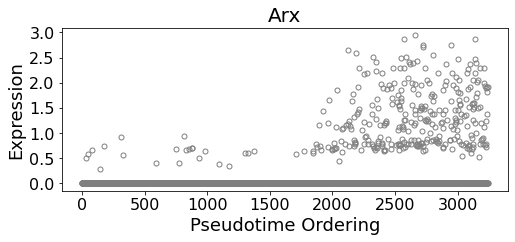

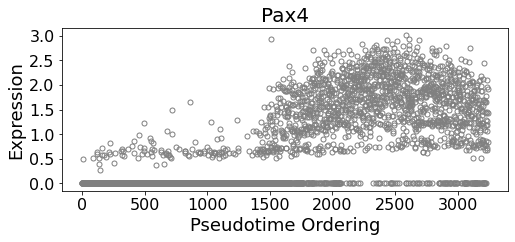

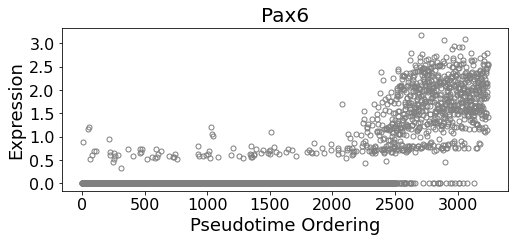

In [34]:
for gene in ['Atoh8','Hes6','Sox4','Dll1','Dll3','Neurog3','Jun','Pdx1','Arx','Pax4','Pax6']:
    ordered_expression = adata_sub_beta[:,gene].X[adata_sub_beta.obs.sort_values(by='dpt_pseudotime')['index']].toarray()
    xdata = range(len(ordered_expression))
    plt.figure(figsize=(8,3))
    plt.plot(xdata, ordered_expression,'.', markerfacecolor='None',color='gray', lw=0.1, markersize=10, alpha=1,zorder=-1)
    plt.title(gene,fontsize=20)
    plt.xlabel('Pseudotime Ordering',fontsize=18)
    plt.ylabel('Expression',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [36]:
import pickle as pkl

In [37]:
pkl.dump(adata_sub_beta,open('data/pancreas_beta_development_e_14_5_traj_adata.pkl','wb'))

In [116]:
sc.pp.filter_genes(adata_sub_beta,min_counts=1)

In [117]:
genes_sub = list(adata_sub_beta.var.index)
sorted_idx = list(adata_sub_beta.obs.sort_values(by='dpt_pseudotime')['index'])

In [118]:
adata_merged_sub.var

gene_ids
Xkr4            ENSMUSG00000051951
Gm1992          ENSMUSG00000089699
Gm37381         ENSMUSG00000102343
Rp1             ENSMUSG00000025900
Rp1-1           ENSMUSG00000109048
...                            ...
AC168977.1      ENSMUSG00000079808
PISD            ENSMUSG00000095041
DHRSX           ENSMUSG00000063897
Vmn2r122        ENSMUSG00000096730
CAAA01147332.1  ENSMUSG00000095742

[27998 rows x 1 columns]

In [119]:
with open('/project/elkabetz_lab/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/data/pancreas_beta_development_e_14_5.raw_count_matrix.tsv','w') as output:
    output.write('cell_id\t'+'\t'.join(genes_sub)+'\n')
    for expr_row,cell in zip(adata_merged_sub[adata_sub_beta.obs.loc[adata_sub_beta.obs['index'][sorted_idx].index].index,genes_sub].X.toarray(),
                             adata_sub_beta.obs['index'][sorted_idx].index):
        output.write(cell+'\t'+'\t'.join([str(int(x)) for x in expr_row])+'\n')
output.close()